In [1]:
from datetime import datetime

import astropy.coordinates as coord
from astropy.time import Time
import astropy.units as u
import numpy as np
import pytz
from IPython.display import HTML

import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.dates import HourLocator, MinuteLocator, DateFormatter
import matplotlib.animation as animation
import matplotlib as mpl

mpl.rcParams['figure.figsize'] = (8,6)
mpl.rcParams['axes.titlesize'] = 26
mpl.rcParams['axes.labelsize'] = 22
mpl.rcParams['xtick.labelsize'] = 18
mpl.rcParams['ytick.labelsize'] = 18

In [2]:
# Set timezone here:
mpl.rcParams['timezone'] = 'US/Eastern'

# Enter address here:
address = '4 Ivy Lane, Princeton, NJ'

Set up an array of times to get the sun and moon position during:

In [3]:
tz = pytz.timezone(mpl.rcParams['timezone'])
times = (Time(datetime(2017, 8, 21, 8, 0, 0).astimezone(pytz.UTC)) 
         + np.linspace(0, 12, 1024) * u.hour)
dt = times.to_datetime(tz)

Get objects representing your location on Earth, the moon's position, the sun's position

In [4]:
loc = coord.EarthLocation.of_address(address)
moon = coord.get_moon(times)
sun = coord.get_sun(times)

Transform to Altitude-Azimuth coordinates at the specified location:

In [5]:
alt_az = coord.AltAz(obstime=times, location=loc)
moon_aa = moon.transform_to(alt_az)
sun_aa = sun.transform_to(alt_az)

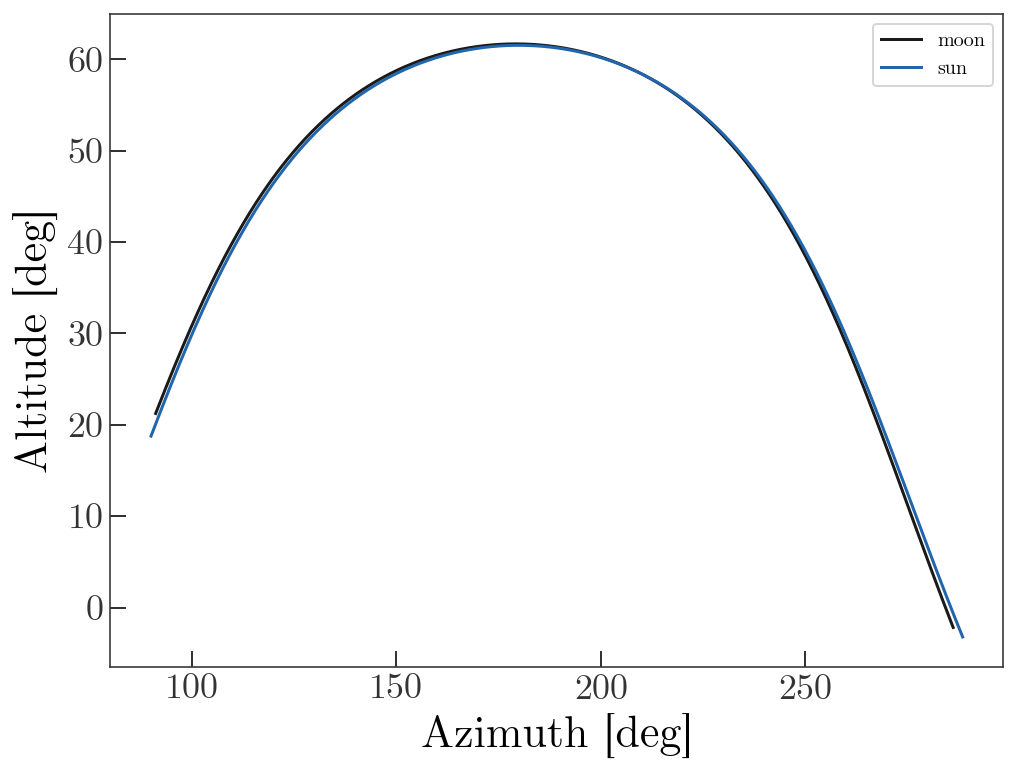

In [6]:
plt.plot(moon_aa.az, moon_aa.alt, marker='None', linestyle='-', label='moon')
plt.plot(sun_aa.az, sun_aa.alt, marker='None', linestyle='-', label='sun')
plt.xlabel('Azimuth [deg]')
plt.ylabel('Altitude [deg]')
plt.legend()

Compute the separation between the moon and the sun. Plot the separation around the time of minimum:

In [7]:
sun_moon_sep = moon_aa.separation(sun_aa)

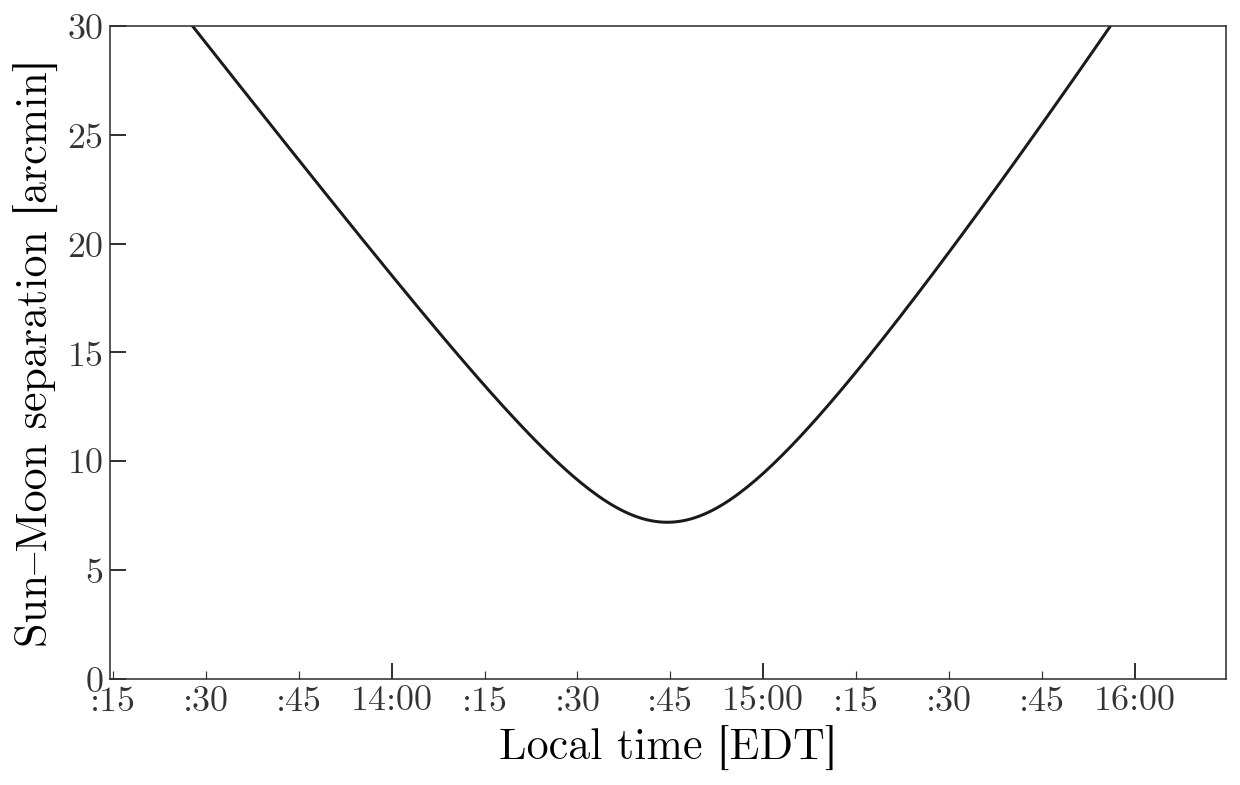

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

ax.plot(dt, sun_moon_sep.to(u.arcmin), marker='None')

ax.xaxis_date(tz=tz)
ax.set_xlim(dt[sun_moon_sep.argmin() - 128], 
            dt[sun_moon_sep.argmin() + 128])

ax.xaxis.set_major_locator(HourLocator())
ax.xaxis.set_major_formatter(DateFormatter('%H:%M'))
ax.xaxis.set_minor_locator(MinuteLocator(byminute=np.arange(15, 60, 15)))
ax.xaxis.set_minor_formatter(DateFormatter(':%M'))

ax.set_ylim(0, 30)

ax.set_xlabel('Local time [{0:%Z}]'.format(dt[0]))
ax.set_ylabel('Sun–Moon separation [arcmin]')

Now we'll make an animation of the eclipse, centered on the Sun's position first:

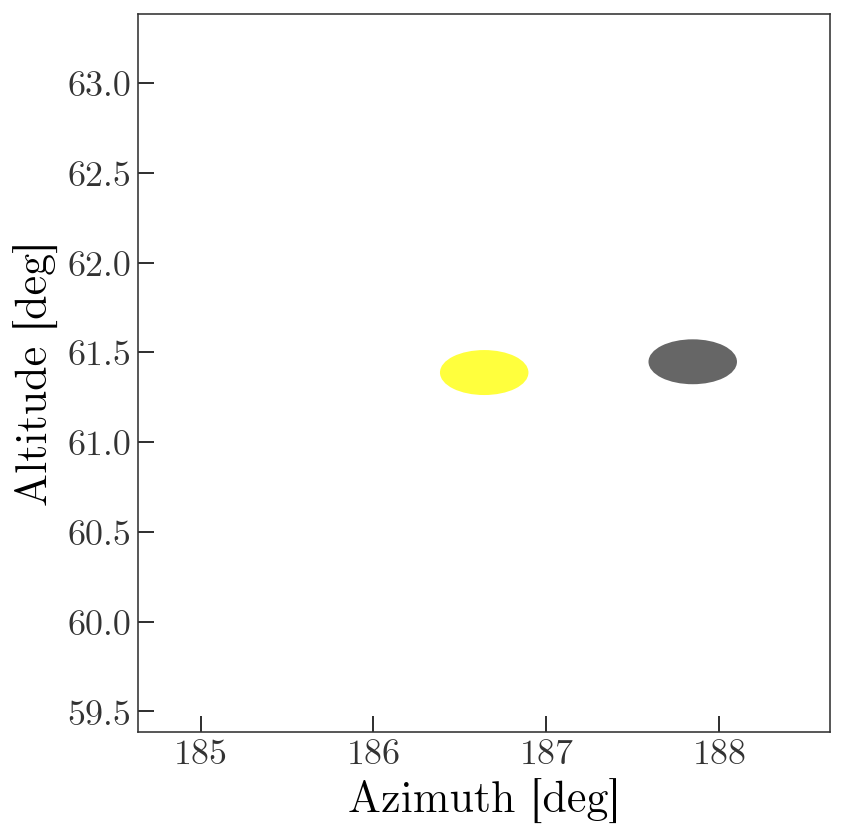

In [9]:
i0 = sun_moon_sep.argmin() - 128
i1 = sun_moon_sep.argmin() + 128

fig, ax = plt.subplots(1, 1, figsize=(6, 6))

x = np.arange(0, 2*np.pi, 0.01)

moon_pa = mpl.patches.Ellipse((0,0), width=0.5, height=0.5, 
                              color='#666666', zorder=10)
sun_pa = mpl.patches.Ellipse((0,0), width=0.5, height=0.5,
                             color='#ffff3d', zorder=1)
ax.add_patch(moon_pa)
ax.add_patch(sun_pa)

ax.set_xlabel('Azimuth [deg]')
ax.set_ylabel('Altitude [deg]')

fig.tight_layout()

def animate(i):
    moon_pa.center = [moon_aa.az[i].degree, moon_aa.alt[i].degree]
    sun_pa.center = [sun_aa.az[i].degree, sun_aa.alt[i].degree]
    
    moon_pa.height = 0.5 * np.cos(moon_aa.alt[i])
    sun_pa.height = 0.5 * np.cos(sun_aa.alt[i])
    
    az_lim = (sun_aa.az[i].to(u.degree).value - 2, 
              sun_aa.az[i].to(u.degree).value + 2)
    alt_lim = (sun_aa.alt[i].to(u.degree).value - 2, 
               sun_aa.alt[i].to(u.degree).value + 2)
    
    ax.set_xlim(az_lim)
    ax.set_ylim(alt_lim)
    
    return moon_pa, sun_pa

def init():
    return animate(i0)

ani = animation.FuncAnimation(fig, animate, np.arange(i0, i1), 
                              init_func=init, interval=25, blit=True)

In [10]:
HTML(ani.to_html5_video())

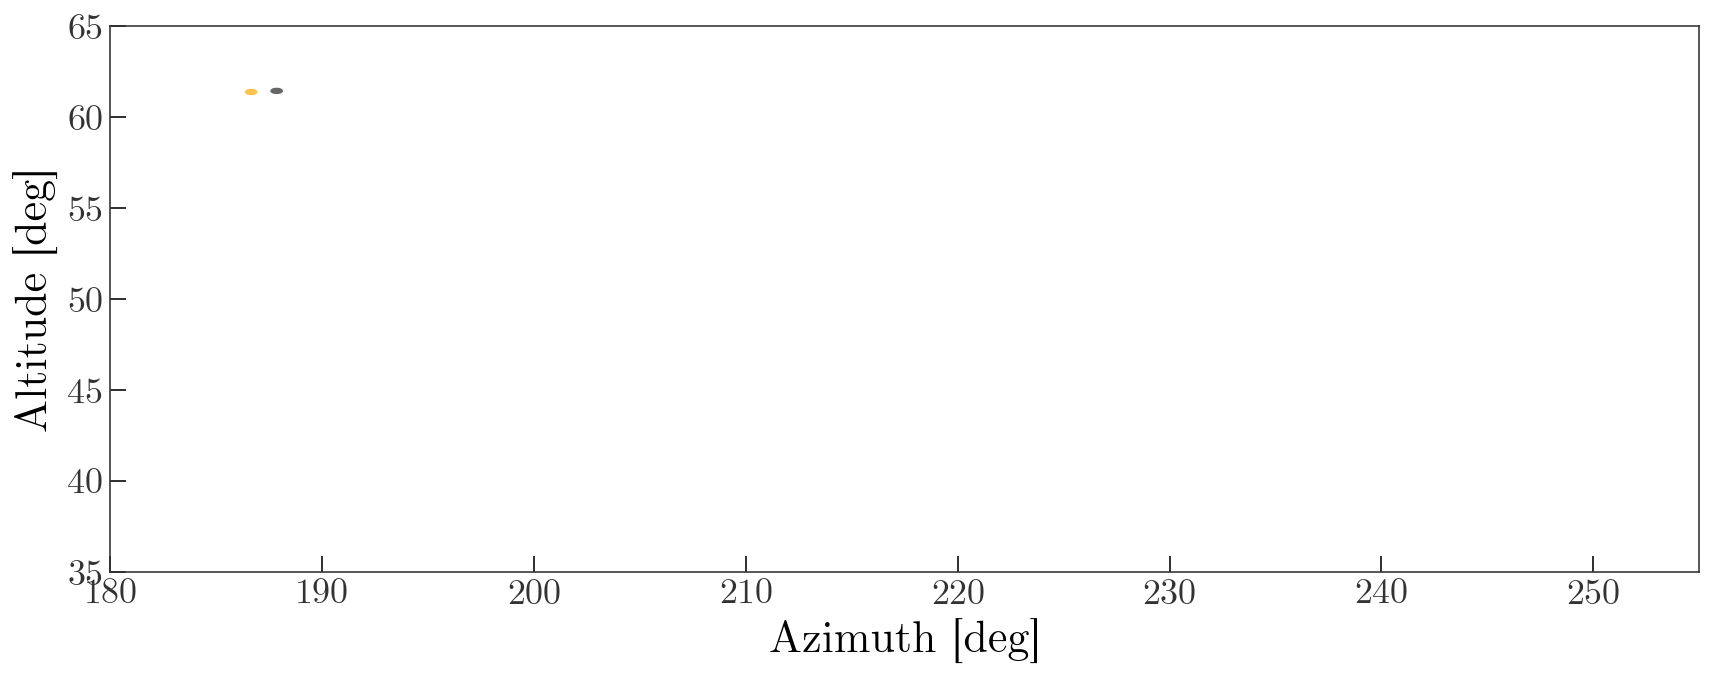

In [11]:
i0 = sun_moon_sep.argmin() - 128
i1 = sun_moon_sep.argmin() + 128

fig2, ax = plt.subplots(1, 1, figsize=(12, 4.8))

x = np.arange(0, 2*np.pi, 0.01)

moon_pa = mpl.patches.Ellipse((0,0), width=0.5, height=0.5, 
                              color='#666666', zorder=10)
sun_pa = mpl.patches.Ellipse((0,0), width=0.5, height=0.5,
                             color='#fec44f', zorder=1)
ax.add_patch(moon_pa)
ax.add_patch(sun_pa)

ax.set_xlabel('Azimuth [deg]')
ax.set_ylabel('Altitude [deg]')

ax.set_xlim(180, 255)
ax.set_ylim(35, 65)

fig2.tight_layout()

def animate2(i):
    moon_pa.center = [moon_aa.az[i].degree, moon_aa.alt[i].degree]
    sun_pa.center = [sun_aa.az[i].degree, sun_aa.alt[i].degree]
    
    moon_pa.height = 0.5 * np.cos(moon_aa.alt[i])
    sun_pa.height = 0.5 * np.cos(sun_aa.alt[i])
    
    return moon_pa, sun_pa

def init2():
    return animate2(i0)

ani2 = animation.FuncAnimation(fig2, animate2, np.arange(i0, i1), 
                               init_func=init2, interval=25, blit=True)

ani2

In [12]:
HTML(ani2.to_html5_video())